# Exploring Dandiset 001359: Human Patch-seq Data

This notebook explores Dandiset 001359, which contains Patch-seq data from human subjects.

**Disclaimer:** This notebook was generated by an AI and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Dandiset Overview

This Dandiset contains Patch-seq recordings (intracellular electrophysiology) from human cells.

You can find more information about this Dandiset on the DANDI archive: https://dandiarchive.org/dandiset/001359/0.250401.1603

## Required Packages

This notebook requires the following packages:

* dandi (for accessing the DANDI archive)
* pynwb (for working with NWB files)
* h5py (for reading HDF5 files)
* remfile (for accessing remote files)
* matplotlib (for plotting)
* numpy (for numerical operations)
* itertools (for iterating through assets)

## Loading the Dandiset

We can use the DANDI API to connect to the archive and retrieve information about the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB file

Dandiset 001359 contains several NWB files. We will load one of them to explore its contents.
We will load the file `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.
The URL for this asset is: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/

In [2]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some metadata from the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: PLACEHOLDER
Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session Start Time: 2022-09-06 17:44:39.146000+00:00


## NWB File Contents

This NWB file contains intracellular electrophysiology data. Key sections include:

*   `acquisition`: Recorded electrophysiological data (VoltageClampSeries and CurrentClampSeries).
*   `stimulus`: Applied electrical stimulation (VoltageClampStimulusSeries and CurrentClampStimulusSeries).
*   `icephys_electrodes`: Information about the recording electrodes.
*   `intervals`: Time intervals for experimental epochs.
*   `sweep_table`: Table linking series to sweeps.

## Exploring Acquisition and Stimulus Data

We can access the recorded voltage/current and the applied stimulus data from the `acquisition` and `stimulus` sections of the NWB file.

In [3]:
# List available acquisition series
print("Available acquisition series:")
for key in nwb.acquisition.keys():
    print(f"- {key} ({type(nwb.acquisition[key]).__name__})")

# List available stimulus series
print("\nAvailable stimulus series:")
for key in nwb.stimulus.keys():
    print(f"- {key} ({type(nwb.stimulus[key]).__name__})")

Available acquisition series:
- data_00000_AD0 (VoltageClampSeries)
- data_00001_AD0 (VoltageClampSeries)
- data_00002_AD0 (VoltageClampSeries)
- data_00003_AD0 (VoltageClampSeries)
- data_00004_AD0 (CurrentClampSeries)
- data_00005_AD0 (CurrentClampSeries)
- data_00006_AD0 (CurrentClampSeries)
- data_00007_AD0 (CurrentClampSeries)
- data_00008_AD0 (CurrentClampSeries)
- data_00009_AD0 (CurrentClampSeries)
- data_00010_AD0 (CurrentClampSeries)
- data_00011_AD0 (CurrentClampSeries)
- data_00012_AD0 (CurrentClampSeries)
- data_00013_AD0 (CurrentClampSeries)
- data_00014_AD0 (CurrentClampSeries)
- data_00015_AD0 (CurrentClampSeries)
- data_00016_AD0 (CurrentClampSeries)
- data_00017_AD0 (CurrentClampSeries)
- data_00018_AD0 (CurrentClampSeries)
- data_00019_AD0 (CurrentClampSeries)
- data_00020_AD0 (CurrentClampSeries)
- data_00021_AD0 (CurrentClampSeries)
- data_00022_AD0 (CurrentClampSeries)
- data_00023_AD0 (CurrentClampSeries)
- data_00024_AD0 (CurrentClampSeries)
- data_00025_AD0 (Cu

## Visualizing a Current Clamp Recording and Stimulus

Let's visualize one of the Current Clamp recordings and its corresponding stimulus. We'll use `data_00005_AD0` from `acquisition` and `data_00005_DA0` from `stimulus`.

Stimulus description for Current Clamp series: X1PS_SubThresh_DA_0


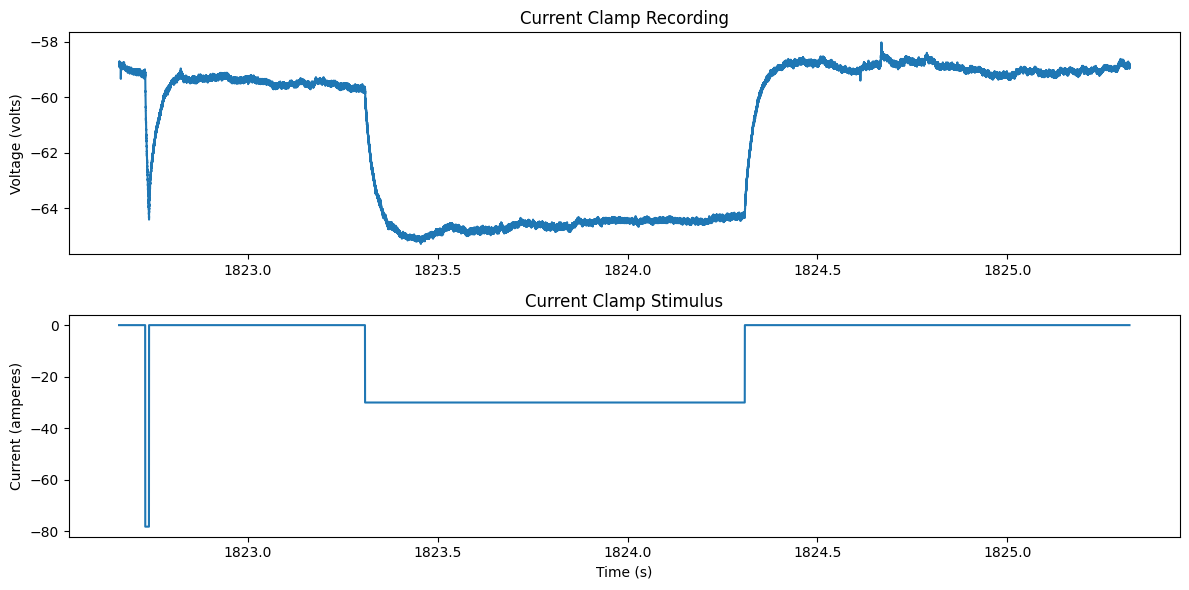

In [4]:
# Get data and stimulus
acquisition_series_cc = nwb.acquisition['data_00005_AD0']
stimulus_series_cc = nwb.stimulus['data_00005_DA0']

# Get stimulus description
print(f"Stimulus description for Current Clamp series: {acquisition_series_cc.stimulus_description}")

# Convert time to seconds relative to the start of the series
# Note: We are only loading a subset of the data for illustration
num_samples = acquisition_series_cc.data.shape[0] # or choose a smaller subset
sampling_rate = acquisition_series_cc.starting_time + np.arange(num_samples) / acquisition_series_cc.rate

# Load a subset of the data into memory
time_cc = sampling_rate
data_cc = acquisition_series_cc.data[:] # Consider slicing for large datasets
stimulus_cc = stimulus_series_cc.data[:] # Consider slicing for large datasets

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_cc, data_cc)
plt.ylabel(f'Voltage ({acquisition_series_cc.unit})')
plt.title('Current Clamp Recording')

plt.subplot(2, 1, 2)
plt.plot(time_cc, stimulus_cc)
plt.ylabel(f'Current ({stimulus_series_cc.unit})')
plt.xlabel('Time (s)')
plt.title('Current Clamp Stimulus')

plt.tight_layout()
plt.show()

## Visualizing a Voltage Clamp Recording and Stimulus

Now let's visualize a Voltage Clamp recording and its corresponding stimulus. We'll use `data_00000_AD0` from `acquisition` and `data_00000_DA0` from `stimulus`.

Stimulus description for Voltage Clamp series: EXTPSMOKET180424_DA_0


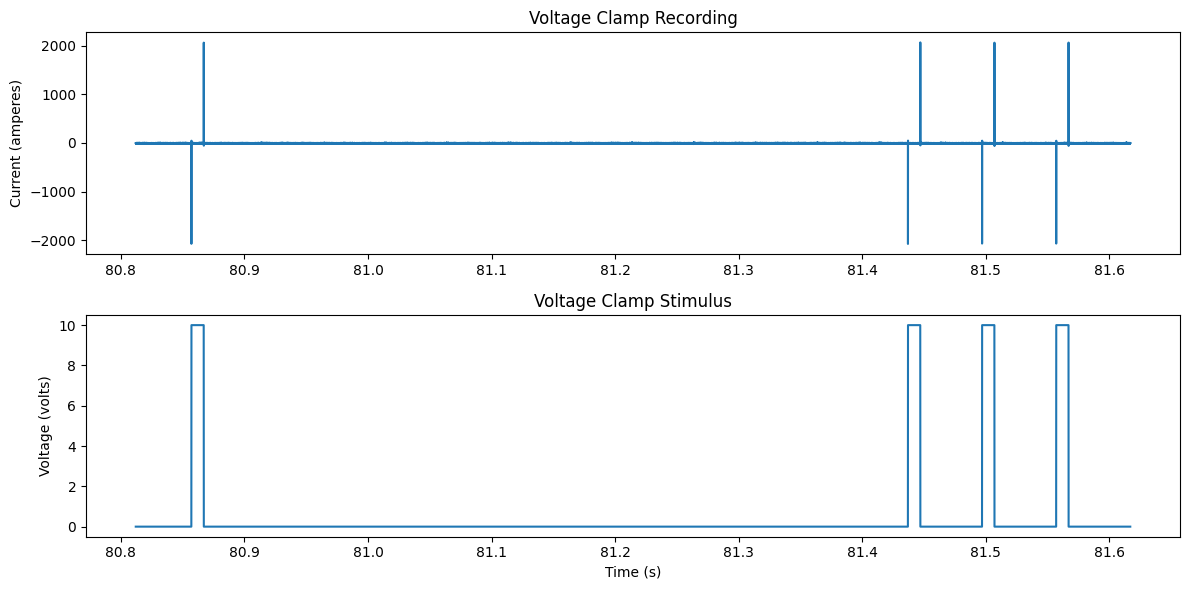

In [5]:
# Get data and stimulus
acquisition_series_vc = nwb.acquisition['data_00000_AD0']
stimulus_series_vc = nwb.stimulus['data_00000_DA0']

# Get stimulus description
print(f"Stimulus description for Voltage Clamp series: {acquisition_series_vc.stimulus_description}")

# Convert time to seconds relative to the start of the series
# Note: We are only loading a subset of the data for illustration
num_samples_vc = acquisition_series_vc.data.shape[0] # or choose a smaller subset
sampling_rate_vc = acquisition_series_vc.starting_time + np.arange(num_samples_vc) / acquisition_series_vc.rate

# Load a subset of the data into memory
time_vc = sampling_rate_vc
data_vc = acquisition_series_vc.data[:] # Consider slicing for large datasets
stimulus_vc = stimulus_series_vc.data[:] # Consider slicing for large datasets

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_vc, data_vc)
plt.ylabel(f'Current ({acquisition_series_vc.unit})')
plt.title('Voltage Clamp Recording')

plt.subplot(2, 1, 2)
plt.plot(time_vc, stimulus_vc)
plt.ylabel(f'Voltage ({stimulus_series_vc.unit})')
plt.xlabel('Time (s)')
plt.title('Voltage Clamp Stimulus')

plt.tight_layout()
plt.show()

## Exploring Epochs

The `epochs` interval table contains information about the experimental epochs. We can convert this to a pandas DataFrame for easier viewing.

In [6]:
# Convert epochs to DataFrame
epochs_df = nwb.epochs.to_dataframe()

# Display the first few rows
print("Epochs table:")
print(epochs_df.head())

Epochs table:
    start_time  stop_time                                               tags  \
id                                                                             
1       80.812     80.857  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
2       80.812     80.912            [Type=Inserted Testpulse, ShortName=TP]   
3       80.857     80.867  [Type=Inserted Testpulse, SubType=Pulse, Ampli...   
4       80.867     80.912  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
5       80.912     81.412   [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]   

                                           timeseries  treelevel  
id                                                                
1   [(1, 9000, data_00000_DA0 pynwb.icephys.Voltag...        1.0  
2   [(1, 20000, data_00000_DA0 pynwb.icephys.Volta...        0.0  
3   [(9001, 2000, data_00000_DA0 pynwb.icephys.Vol...        1.0  
4   [(11001, 9000, data_00000_DA0 pynwb.icephys.Vo...        1.0  
5   [(20001, 100000, da

## Exploring Sweep Table

The `sweep_table` links different PatchClampSeries together by sweep number. We can also convert this to a pandas DataFrame.

In [7]:
# Convert sweep table to DataFrame
sweep_table_df = nwb.sweep_table.to_dataframe()

# Display the first few rows
print("\nSweep table:")
print(sweep_table_df.head())


Sweep table:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2


## Summary and Future Directions

This notebook demonstrated how to access and visualize intracellular electrophysiology data from a human Patch-seq Dandiset. We showed how to load the Dandiset and an NWB file, explore its contents, and visualize examples of current clamp and voltage clamp recordings and stimuli.

Potential future directions for analysis include:

*   Analyzing and comparing different sweeps within the same series.
*   Extracting and analyzing electrophysiological features (e.g., resting membrane potential, input resistance, action potential properties).
*   Relating the electrophysiological properties to available transcriptomic or morphological data in the Dandiset (if applicable).
*   Exploring data from other NWB files in the Dandiset.

In [8]:
# Close the NWB file
io.close()